# DOUBLES DIFFERENCES

Cette application est inspirée de l'article de K. A. Kiel and K. T. McClain (1995) : "The Effect of an Incinerator Siting on Housing Appreciation Rates", *Journal of Urban Economics*, 37(3):311-323, et du manuel de Wooldridge (voir bibliographie du cours).

Kiel et McClain (1995) étudient l'impact de l'environnement sur le prix de l'immobilier. Pour cela, elles étudient l'effet de la construction d'un nouvel incinérateur de déchets sur la valeur de l'immobilier dans une ville du Massachussetts. 

Le projet s'ébruite en 1978, la construction devient effective en 1981, et l'incinérateur fonctionne à partir de 1985. Nous utilisons ici des données simplifiées, disponibles sur internet : kielmc.raw. Les données sont également dans le répertoire : **TD9_kielmc.rds**

# Introduction

Comment s'appelle ce type d'évènement, mobilisé dans les études d'économétrie appliquée ?

c'est une expérience naturelle, une quasi-expérience 
On va mesure l'effet de l'environement sur le prix de l'imobilier.

On a besoins de plusieur informaiton : 
- dimension temporelle : prix affecté des la rumeurs : date clefs (1978) la rumeurs de la construction 
- dimension traitement/controle

De quelles informations avons-nous besoin pour analyser l'impact de l'incinérateur sur la valeur de l'immobilier en double différence ? 

Quel est le résultat attendu ? 

On s'attend que le prix es maison proche de l'incinérateur baissse. Car c'est une polution visuel et environenemental. 


# 1. Les données

Ouvrir les données : **TD9_kielmc.rds**.

In [1]:
ds<-readRDS(file="TD9_kielmc")
head(ds)

,year,age,nbh,cbd,intst,price,rooms,area,land,baths,dist,wind
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1978,48,4,3000,1000,60000,7,1660,4578,1,10700,3
2,1978,83,4,4000,1000,40000,6,2612,8370,2,11000,3
3,1978,58,4,4000,1000,34000,6,1144,5000,1,11500,3
4,1978,11,4,4000,1000,63900,5,1136,10000,1,11900,3
5,1978,48,4,4000,2000,44000,5,1868,10000,1,12100,3
6,1978,78,4,3000,2000,46000,6,1780,9500,3,10000,3


Consulter le codebook et répondre aux questions :
![title](TD9_codebook.png) 

a) Quelle sera la variable dépendante ? 

b) Quelle sera la variable d'intérêt ?

c) A quoi peuvent servir les autres variables ? Donner un exemple.

a) variable dépendante : prix de la maison 

b) la variable d'intérêt : celle où on veut mesure l'impact causal : distance à l'incinérateur. 
On aurait pu aussi utiliser wind : pollution dépend aussi du sens du vent 

c) Pour éviter le biais ou améliorer la précision de l'estimation

Considérons que le travail de nettoyage des données a été fait. Quelles variables devrions-nous créer pour notre analyse : 

a) afin d'avoir un groupe de traitement et un groupe de contrôle ? *Indice : il faut définir les groupes de traitement/contrôle en fonction d'un seuil de distance à l'incinérateur : + ou - 5km soit 15840 pieds*.

si on est a plus : c 
si on est à moins : t 

b) afin d'étudier l'effet de la distance sur la variation du prix exprimée non plus en niveau mais en pourcentage ? *Indice : penser à la transformation logarithmique*.

on a plus besoins du prix mais du log du prix 

Créer ces 2 variables.

In [2]:
ds$lprice<-log(ds$price)

In [3]:
ds$nearinc<-ifelse(ds$dist<15840, 1, 0)

# 2. Analyses "naïves"

Nous commençons par une **analyse naïve avec données en coupe** : nous utilisons les données de 1981 seulement et estimons : $lprice^{81}_{i} = \alpha^{81} + \gamma^{81} nearinc_{i} + u^{81}_{i}$. Interpréter.

In [4]:
naive1<-lm(lprice~nearinc, data=ds[ds$year==1981,])

In [5]:
summary(naive1)


Call:
lm(formula = lprice ~ nearinc, data = ds[ds$year == 1981, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86626 -0.21706  0.02718  0.24035  1.16633 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.74242    0.03428 342.543  < 2e-16 ***
nearinc     -0.40257    0.06459  -6.233 5.06e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3462 on 140 degrees of freedom
Multiple R-squared:  0.2172,	Adjusted R-squared:  0.2116 
F-statistic: 38.85 on 1 and 140 DF,  p-value: 5.061e-09


en 1981, les maison qui sont situées dans un rayon de <5KM se vendent 40% moins cher. 

Quelle est la condition pour que ce résultat puisse être interprété comme une causalité ? Pourquoi peut-on penser que cette condition n'est pas remplie ? 

Pour une causalité : il faudrait que les maison : en absence de l'incinérateur : soit à l'origine de la meme valeur en moyenne : proche ou eloigne de ce dernier. 

Ce n'est pas le cas on immplémente les incinérateur la ou les maison sont moins chers : la ou il y a peux de votant 

Comment tester cela avec les données dont nous disposons ? Effectuer le test sur deux variables qui vous sembleront pertinentes. Conclure.

On peut le verifier : test d'egalité de moyenne : sur les caractéristique des maisons. 
ex : verifier : maisons plus ou oins vielle : meme nombre de peices : en fonction de la distance de l'incinérateur.


In [6]:
t.test(age~nearinc, data=ds)
t.test(rooms~nearinc, data=ds)


	Welch Two Sample t-test

data:  age by nearinc
t = -6.0601, df = 158.48, p-value = 9.564e-09
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -31.86424 -16.19965
sample estimates:
mean in group 0 mean in group 1 
       10.82222        34.85417 



	Welch Two Sample t-test

data:  rooms by nearinc
t = 6.2777, df = 143.95, p-value = 3.816e-09
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.4910195 0.9423138
sample estimates:
mean in group 0 mean in group 1 
       6.800000        6.083333 


premier test : 
- dans le goupe eloigne : maison 10 ages 
- dans le groupe proche : maison 34 age 
c'est significatif , pvalue proche de 0

deuxième test: 
- dans le goupe eloigne : maison plus grande 
- dans le groupe proche : maison moins grande 
c'est significatif , pvalue proche de 0

donc les maisons sont differentes dans les deux zone. Donc on ne peut pas pensser le resultat comme un causalité , il semblerait que le groue de controle ne soit pas le meilleur contre-factuel pour le groupe de traitement. 

**Second type d'analyse naïve** : Nous pensons avoir identifié un meilleur contrefactuel pour les maisons proches d'un incinérateur : ces mêmes maisons, avant que l'incinérateur ne soit contruit. Quelle sera la régression ? Estimer.

on regarde sous-échantillon des traités et on fait estimateur avant-après. 

Biaisé car tient compte de l'impact de la construction dans le temps et tout les austre facteurs qui influences les prix dans le temps. 

In [7]:
naive2<-lm(lprice~factor(year),data=ds[ds$nearinc==1,])
summary(naive2)


Call:
lm(formula = lprice ~ factor(year), data = ds[ds$nearinc == 1, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7185 -0.2368 -0.1069  0.1572  1.6660 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.94550    0.05599 195.489  < 2e-16 ***
factor(year)1981  0.39435    0.08674   4.546 1.62e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.419 on 94 degrees of freedom
Multiple R-squared:  0.1802,	Adjusted R-squared:  0.1715 
F-statistic: 20.67 on 1 and 94 DF,  p-value: 1.625e-05


# 3. Doubles différences

Ecrire et estimer par MCO la régression par double différence simple qui va permettre de déterminer si la construction de l'incinérateur a un impact sur la valeur immobilière des maisons. 

Doubles différence simple: on mets siplement comme explicative : les ellements de la double différence. 

In [8]:
dd<-lm(lprice~nearinc+factor(year)+nearinc:factor(year), data=ds)
summary(dd)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year), 
    data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11957 -0.20328  0.02226  0.18909  1.66604 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              11.28542    0.03051 369.839  < 2e-16 ***
nearinc                  -0.33992    0.05456  -6.231 1.48e-09 ***
factor(year)1981          0.45700    0.04532  10.084  < 2e-16 ***
nearinc:factor(year)1981 -0.06265    0.08344  -0.751    0.453    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3384 on 317 degrees of freedom
Multiple R-squared:  0.4091,	Adjusted R-squared:  0.4035 
F-statistic: 73.15 on 3 and 317 DF,  p-value: < 2.2e-16


Interpréter les coefficients obtenus.

la constante : nous donne le prix moyen d'une maison hors du rayon de 5km en 1978

beta : associé a facto(year): nous le changement moyen des prix des maison eloigné de l'incinerateur ayant eu lieu entre 1978 et 1981. Les maisons a plus de 5km on prix 45% entre 78 et 81

gamma : nous donnes la diference de prix moyenne entre les deux zones avant la présence de l'incénareteur. Avant la presence de l'incinareteur les prix etati différent de 33%. Les prix etaite infeireur de 33% dans les zones de 5KM d'un futur incinerateur que des zones plus eloigné

coeficient dinteraction : date:statutdanstrateiment : nous donne l'effet sur le prix d'etre proche de l'incinerteur en 81. Il donne l'effet du traitemnt ( construction de l'incinérateur ). 


Donc : les prix on augmente de 45% pour les autres maisons , le prix des maison a proximité d'un incinerateur a augemnte de (45-6). C'est l'effet additionel d'etre dans le rayon de 5KM que de ne pas l'etre. 


Ces coeficient , ne sont pas significatif. Pvalue trop elleve , coeficient zero tatistique.  on ne pas rehetere l'hypothès que les tansaction se font a prix egal, avec ou sans l'incinerateur. 


Estimer la régression : $price^{78}_{i} = \alpha^{78} + \gamma^{78} nearinc_{i} + u^{78}_{i}$ pour l'année 1978.

In [9]:
naive3<-lm(lprice~nearinc, data=ds[ds$year==1978,])
summary(naive3) 

#difference pre-traitement ce qui se passe avant la présence de l'incinérateur 


Call:
lm(formula = lprice ~ nearinc, data = ds[ds$year == 1978, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11957 -0.18781  0.01555  0.15439  1.66604 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.28542    0.02995 376.845  < 2e-16 ***
nearinc     -0.33992    0.05354  -6.349 1.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3321 on 177 degrees of freedom
Multiple R-squared:  0.1855,	Adjusted R-squared:  0.1809 
F-statistic: 40.31 on 1 and 177 DF,  p-value: 1.769e-09


la dif pré-traitement est de 33% commme vu précédemment.

En reprenant le résultat de la première estimation naïve (partie 1), recalculez le coefficient de double différence. 

dd c'est l'effet du temps sur groupe de traitement moins la difference de tendance de groupe de contrôle. 

t-c en 81 : -39% 
t-c en 78 : -33% 

dd : -39% - (-33%) = -6%

In [10]:
coef(naive1)[2]-coef(naive3)[2]

nearinc 
-0.06264902

effet non significatif : ameliorer l'estimation : avec variable de controles

# 4. Améliorer l'estimation

Quel est l'intérêt d'introduire des variables de contrôle dans notre cadre ?

age de la maison,age^2,la taille de la maison, taille du terrain , nombre de piece, nombre de salle de bain , distance au voies de communication importante 

Linteret : 
- car on a biais de slection : lié à la composition de l'echantillon
Il est possible que les maisons qui se vendent en 1978 pres de l'incinérateur n'est pas les memes caracteriqitique que celle qui se vendent en 81. 
Ex : les plus roches : plus grane maisosn : qui parten en premier. 

C'est un effet de composition : le groupe de traitement a changer de composition entre avant et apres : explique le resultat en partis : biais lie a la composition de l'echantillon. 

Donc l'effet de la constructin de l'incinérateur sur le prix des maisons va etre minimisé; car en réalaité les prix vont etre plus elleve car plus grande maison qui partent. 

- amméliorere precision de l'estimation : 
On peut ajouter des variables qui expliquenet le prix et mechaniquement avoir un impùact reducteur sur les erreuts types et mieux explqiuer les coeficients. 



Parmi les variables du *codebook*, quelles variables peuvent être particulièrement intéressantes à introduire ? 

l'âge de la maison

Estimer le modèle de doubles différences par MCO avec ces variables de contrôle et en introduisant l'âge de la maison *age* de manière non linéaire comme un polynôme de degré 2: **poly(age,2)**. 

In [11]:
dd_c<-lm(lprice~nearinc+factor(year)+nearinc:factor(year)+poly(age,2)+area+land+rooms+baths+intst,data=ds)
summary(dd_c)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year) + 
    poly(age, 2) + area + land + rooms + baths + intst, data = ds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21669 -0.09372  0.01157  0.10698  0.68553 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.027e+01  1.116e-01  91.967  < 2e-16 ***
nearinc                  -3.464e-02  4.647e-02  -0.745 0.456621    
factor(year)1981          4.026e-01  2.921e-02  13.786  < 2e-16 ***
poly(age, 2)1            -2.087e+00  2.641e-01  -7.901 4.86e-14 ***
poly(age, 2)2             1.259e+00  2.924e-01   4.306 2.23e-05 ***
area                      1.840e-04  2.406e-05   7.645 2.64e-13 ***
land                      9.223e-07  3.243e-07   2.844 0.004752 ** 
rooms                     5.276e-02  1.734e-02   3.044 0.002538 ** 
baths                     1.030e-01  2.694e-02   3.825 0.000158 ***
intst                    -3.553e-06  2.049e-06  -1.734 0

Interprétez les résultats, et notamment l'effet de l'âge.

il etait important d'introduire des variabels de controles car le coeficient de la varibles d'interet: coefieicnet d'intereaction : devient significatif au seuil de 10%. 

Donc , du fait de la presence du nouvel incinérateur le prix des maison alontour on perdu pres de 10% de leur valeur. Ici , on a une relation causal entre la presence de l'incinérateu et leprix des maisons aux allontours. 


On voit que ces variables on un pouvoir signidficatif important le R2, est passéà 0,7. 

l'age influence le prix de manière quadratique , cad que le prix de vente diminue avec l'age mais de mois en moins negatif a mesure que l'age de la maison avance. 

Plus la maison, terrain, nombre de piece , nombres de salle de bain est grands plus le prix est ellevé. 




Représentez graphiquement l'effet de l'âge sur le prix. 

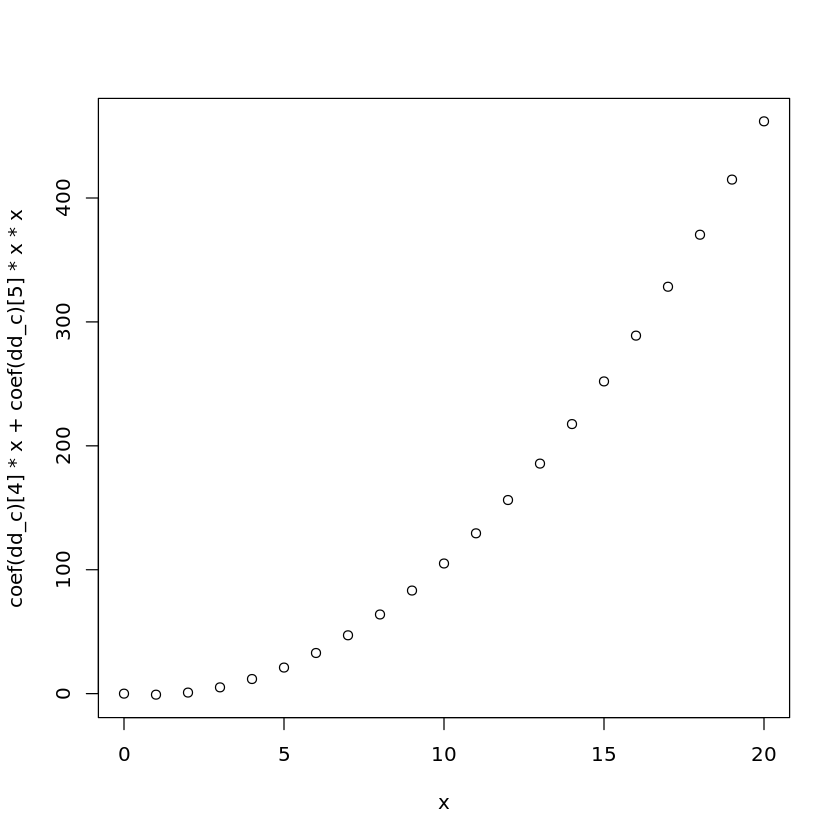

poly(age, 2)2 
     1.206723

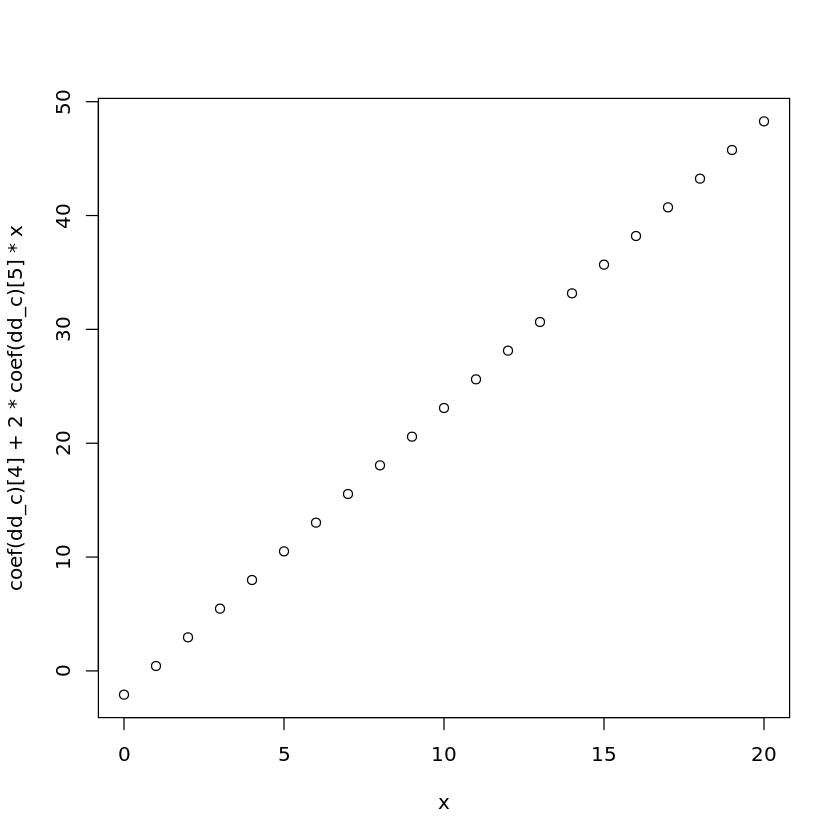

In [24]:
x<-seq(0,20,1)
plot(x,coef(dd_c)[4]*x+coef(dd_c)[5]*x*x)#terme au caré donc x*x
plot(x,coef(dd_c)[4]+2*coef(dd_c)[5]*x)#effet marginal de passé de l'année 1 à 2 etc, on fait la dérivée de la première fonction
#point de retournement : on cherche l'âge de la maison (x) tel que l'effet marginal soit égal à 0
(+2*coef(dd_c)[5])/(-coef(dd_c)[4])

effet marginal pour une année suplementaire , une maison qui à 5 an : quand elle aura 6 ans l'effet margial sur le prix sera de +12%. Plus l'age monte , plus l'effet marginal est important. 

# 5. Tester la robustesse des résultats

Quelle est l'hypothèse qui conditionne la validité de l'estimateur par double différence ? 

C'est l'hypothèse des tendances parallèles : en l'absance d'incinerateru : le prix des deux groupes de maison : aurait du evolue de la meme manière 

Peut-on tester cette hypothèse directement ?

On ne peut jamais tester formelement cette hypothèse car on n'oberve pas la meme maison a proximité et hors de la zone de l'incinérateur. La maison ne peut pas etre une traité et un controle au meme moment. 

Quelles sont les 3 manières de convaincre votre lecteur que l'hypothèse est bien validée ? Avez-vous des idées pour implémenter ces différents tests de robustesse ?

Les 3 tests : 

- la falcification ou test placebo  
- utiliser un groupe temoin diferents 
- replique la meme analyse avec d'autre varible dependante : qui elle ne devrait pas etre affeecté 

- placébo: année précédente non dispo
- témoin dif: faire varier rayon le rayon de definition de notre variable nearinc : et on regarde si le resultat tient
- répplication: voir si caracterisitque des logements ne change pas : en remplaceant le prix par les differentes caracteristiques. 
- placebo : reste le plus classique : avec d'autre données des années précedentes

On réussit à trouver d'autres données pour les années précédentes: 1976 et 1974. Ces données se trouvent dans le fichier simulé : **TD9_kielmc_generated_forplacebo**.

On propose donc un test placebo. 

a) Ouvrir ces données. 

In [30]:
dsp<-readRDS("TD9_kielmc_generated_forplacebo")

b) On réalise d'abord le test placebo visuel en présentant l'évolution du prix moyen des maisons *price* dans le temps graphiquement, selon si les maisons sont proches ou loin de l'incinérateur *nearinc*.  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2976  1.0000  1.0000 

Eloigné  Proche 
    446     189

No summary function supplied, defaulting to `mean_se()



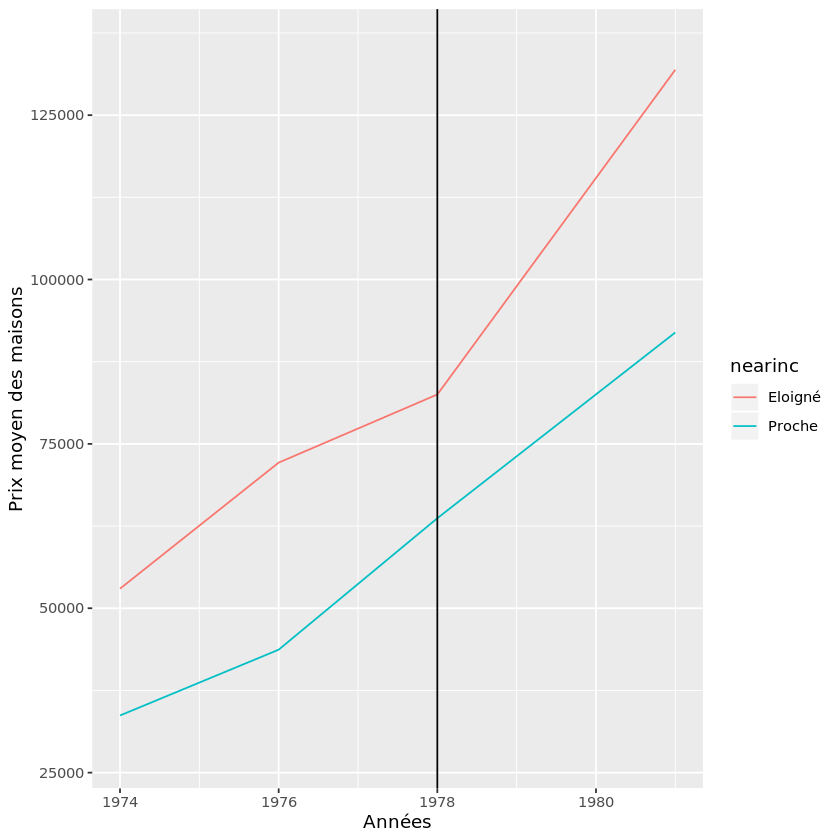

In [31]:
#test visuel : 
library(ggplot2)
summary(dsp$nearinc)
dsp$nearinc<-factor(dsp$nearinc, levels=c(0,1), labels=c("Eloigné","Proche"))
summary(dsp$nearinc)
ggplot(dsp, aes(x=year, y=price, color = nearinc)) +
    stat_summary(geom = 'line') +
    geom_vline(xintercept = 1978) + xlab("Années") + ylab("Prix moyen des maisons")

c) On estime formellement une régression placebo sur le sous-échantillon de 1974-1976.

In [32]:
dd_p<-lm(lprice~nearinc+factor(year)+nearinc:factor(year)+poly(age,2)+area+land+rooms+baths+intst,data=dsp[dsp$year<1978,])
summary(dd_p)


Call:
lm(formula = lprice ~ nearinc + factor(year) + nearinc:factor(year) + 
    poly(age, 2) + area + land + rooms + baths + intst, data = dsp[dsp$year < 
    1978, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4840  -0.1633   0.0307   0.3069   1.6362 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.014e+00  5.683e-01  14.102  < 2e-16 ***
nearincProche                   6.768e-02  2.373e-01   0.285  0.77566    
factor(year)1976                2.387e-02  1.491e-01   0.160  0.87292    
poly(age, 2)1                  -6.813e+00  1.318e+00  -5.171 4.24e-07 ***
poly(age, 2)2                   3.968e+00  1.463e+00   2.713  0.00705 ** 
area                            4.155e-04  1.221e-04   3.402  0.00076 ***
land                            1.565e-06  1.637e-06   0.956  0.33964    
rooms                           2.125e-01  8.773e-02   2.422  0.01603 *  
baths                           1.650e-01  1.

coef d'intérêt est proche de 0 et pas significativement dif

d) Conclure.

On remarque que le coeficient : est proche de zero et nest pas significativement fiferent de zero. 
test visuel et formel : sugere : hyp des tendances parallèles est valide, avant l'implantation de l'incenerateur : le quartier etatit deja moins bien évalué : mais les tendances d'évaluation des prix étaient les mêmes : jusqu'au moment de la construction de l'incinérateur ou la hausse de spris des t a tendance a monte plus que ceux des c. 